In [1]:
# Initialize Sentiment Analyzer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tweepy
import time
import pandas 
import matplotlib.pyplot as plt
import requests as req
import json
import random 
import numpy
analyzer = SentimentIntensityAnalyzer()
consumer_key ="OXIssui06lxnfblyDvyggPZDf"
consumer_secret ="NrYzmgtyU9grTqJPXR1I9VRMJZ7ViIaYluLLSpqa0bQZ713Rli"
access_token ="326281341-haVlmBoQsZbodflSAbbunuRwnqvuOEynygFeu4XZ"
access_secret = "askACO40IXdUOqMvVcIEGW5lO1gW8zMwOUkGYeEa80XCK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
target_user = "BBCWorld"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


# BBC (@BBCWorld) 
# CBS (@CBSNews)
# CNN (@cnn)
# Fox (@foxnews)
# New York times (@nytimes)


In [3]:
len(tweet_text)

100

In [4]:
tweet_text[0]

'North Carolina officer charged for tasing jaywalker https://t.co/k56Z4x82OQ'

In [5]:
compound_bbc=[]
for bbctweet in tweet_text:
    results = analyzer.polarity_scores(bbctweet)
    compound = results["compound"]
    compound_bbc.append(compound)

In [6]:
target_user = "CBSNews"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


In [7]:
compound_cbs=[]
for cbstweet in tweet_text:
    results = analyzer.polarity_scores(cbstweet)
    compound = results["compound"]
    compound_cbs.append(compound)

In [8]:
target_user = "cnn"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


In [9]:
compound_cnn=[]
for cnntweet in tweet_text:
    results = analyzer.polarity_scores(cnntweet)
    compound = results["compound"]
    compound_cnn.append(compound)

In [10]:
target_user = "foxnews"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


In [11]:
compound_fox=[]
for foxtweet in tweet_text:
    results = analyzer.polarity_scores(foxtweet)
    compound = results["compound"]
    compound_fox.append(compound)

In [12]:
target_user = "nytimes"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


In [13]:
compound_nytimes=[]
for nytimestweet in tweet_text:
    results = analyzer.polarity_scores(nytimestweet)
    compound = results["compound"]
    compound_nytimes.append(compound)

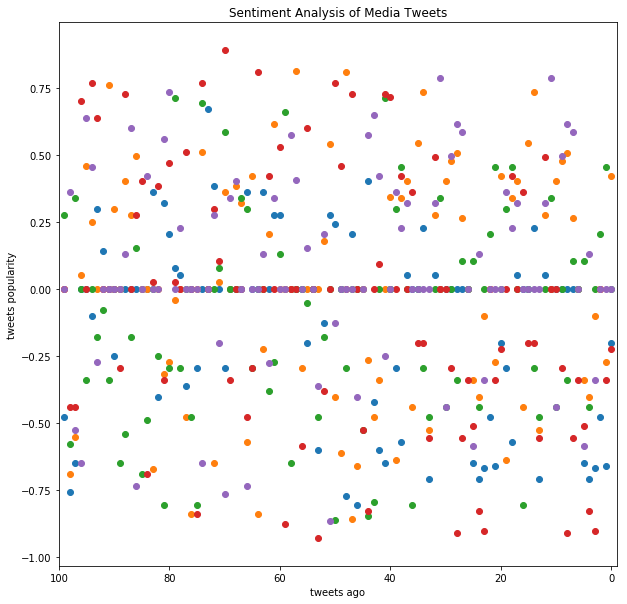

In [14]:
# Build scatter plot for tracking tweet polarity by tweet history

plt.figure(figsize=(10, 10))
plt.scatter(x = range(100), y =compound_bbc, label="BBC News")
plt.scatter(x = range(100), y =compound_cbs, label="CBS")
plt.scatter(x = range(100), y =compound_cnn, label="CNN")
plt.scatter(x = range(100), y =compound_fox, label="FOX")
plt.scatter(x = range(100), y =compound_nytimes, label="NYTimes")
plt.xlim(100, -1)
plt.xlabel("tweets ago")
plt.ylabel("tweets popularity")
plt.title("Sentiment Analysis of Media Tweets")
plt.show()

In [26]:
bbc_mean = numpy.mean(compound_bbc)

/Users/austingould/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [-0.2023, -0.6597, -0.4767, -0.6697, -0.7096, -0.6486, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0531, -0.7096, 0.2263, 0.0, 0.0, 0.0516, -0.5719, -0.296, -0.2023, -0.6597, -0.4767, -0.6697, -0.7096, -0.6486, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0531, -0.7096, 0.2263, 0.0, 0.0, 0.0516, -0.5719, -0.296, 0.0, -0.6486, -0.5994, -0.4215, 0.4019, 0.0, -0.8074, 0.2023, -0.7717, 0.0, 0.2415, 0.2732, -0.128, -0.5994, 0.0, -0.2023, 0.0, 0.0, 0.0, 0.0, 0.2732, 0.2732, 0.0, 0.3612, 0.0, 0.0, 0.3612, 0.0, 0.0, 0.0, -0.296, 0.0, 0.3818, 0.6705, 0.0, -0.296, 0.0, -0.3612, 0.0516, 0.0772, 0.2023, 0.3182, -0.4019, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.25, 0.0, 0.1406, 0.296, -0.1027, 0.0, 0.0, -0.6486, -0.7579, -0.4767] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/austingoul

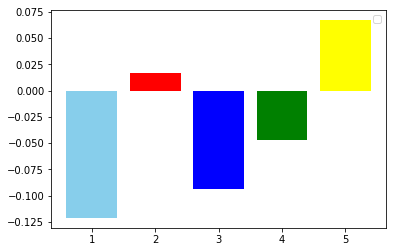

In [27]:
# The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADE

bbc_mean = numpy.mean(compound_bbc)
plt.bar(left= 1, height= bbc_mean, color="skyblue")
plt.bar(left= 2, height= numpy.mean(compound_cbs), color="red")
plt.bar(left= 3, height= numpy.mean(compound_cnn), color="blue")
plt.bar(left= 4, height= numpy.mean(compound_fox), color="green")
plt.bar(left= 5, height= numpy.mean(compound_nytimes), color="yellow")
plt.legend((compound_bbc, compound_cbs),('BBC','CBSNews'))
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, bar=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)
plt.show()


In [ ]:
# # Export to CSV
# file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
# tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

# # Create a legend
# lgnd = plt.legend(fontsize="small", mode="Expanded", 
#                   numpoints=1, scatterpoints=1, 
#                   loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
#                   labelspacing=0.5)

# # Save the figure (and account for the legend being outside the plot when saving)
# file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
# plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# ```python
# # Average all polarities by news source
# tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# # View the polarities
# pd.DataFrame(tweet_df_polarity)

I am still struggling with this to understand the difference in overall sentiment, and polarity. 